In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 34.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [3]:
otp = '16621182221099710310'
data = fs.fn_consolidated(otp=otp, term='2020Q4')
data['avg_volume']

2020Q4...OK


symbol
A        1583030
AA       4514200
AADI      100513
AAIC      195900
AAL     54210000
          ...   
ZUO      1440630
ZVO       527933
ZWS       703667
ZYME      321367
ZYXI      825697
Name: avg_volume, Length: 3229, dtype: int64

In [5]:
data = fs.fn_consolidated(otp=otp, term='2020Q4', vol=0)
data['avg_volume']

2020Q4...OK


symbol
A       1583030
AA      4514200
AACG      23233
AADI     100513
AAIC     195900
         ...   
ZUO     1440630
ZVO      527933
ZWS      703667
ZYME     321367
ZYXI     825697
Name: avg_volume, Length: 4233, dtype: int64

In [7]:
data = fs.fn_consolidated(otp=otp, term='2020Q4', vol=1000000)
data['avg_volume']

2020Q4...OK


symbol
A         1583030
AA        4514200
AAL      54210000
AAPL    186217000
ABB       1482000
          ...    
ZS        3182870
ZSAN      4593800
ZTO       3821430
ZTS       1792600
ZUO       1440630
Name: avg_volume, Length: 1273, dtype: int64

In [8]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)
    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']   
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] 

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [9]:
data['2010Q4']

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,GP/A,GP/E,Liability/Equity,Debt/Equity,Current Ratio,Share Increase,Gross Margin,Asset Turnover,Equity Turnover,Price Growth
symbol,,,,,,,,,,,,,,,,,,,,,
AEM,2010Q4,1422.520,677.472,745.049,94.327,353.785,332.116,2.0500,595.764,403.278,...,0.135455,0.203263,0.500593,0.180200,2.222874,1.0,0.523753,0.258624,0.388089,1.0
ARLP,2010Q4,1610.060,1060.600,549.468,50.818,351.769,245.319,3.3400,351.769,351.769,...,0.366000,1.205547,2.293833,1.585100,3.255632,1.0,0.341272,1.072458,3.532514,1.0
AUY,2010Q4,1686.780,631.060,1055.720,137.580,571.090,451.412,0.6200,871.800,571.090,...,0.102505,0.144802,0.412638,0.066735,2.327407,1.0,0.625879,0.163778,0.231358,1.0
BAM,2010Q4,13623.000,10199.000,3424.000,417.000,2212.000,1699.000,1.0667,3007.000,2212.000,...,0.043824,0.117292,1.676452,1.040216,2.015736,1.0,0.251340,0.174361,0.466669,1.0
BCE,2010Q4,17814.900,4805.470,13009.400,5759.970,4052.900,2184.800,2.8000,7249.440,4052.900,...,0.341123,0.736434,1.158853,0.654603,0.596856,1.0,0.730254,0.467129,1.008463,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGB,2010Q4,273.652,138.530,135.122,23.550,91.752,144.371,0.7900,101.782,91.752,...,0.202378,0.296112,0.463140,0.081500,4.221638,1.0,0.493773,0.409861,0.599693,1.0
TRI,2010Q4,13070.000,10061.000,3009.000,34.000,1419.000,916.000,1.2006,2993.000,1419.000,...,0.084687,0.152935,0.805896,0.382100,0.730194,1.0,0.230222,0.367848,0.664295,1.0
TRQ,2010Q4,79.765,94.770,-15.005,84.420,-320.135,-211.492,-5.0000,-304.735,-320.135,...,NaN,-0.008261,0.771856,0.166800,1.424124,1.0,-0.188115,0.024784,0.043913,1.0


In [10]:
# GP/E + 소형주 + 증자X + 중유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 13.09%
Accumulated return: 242.45%
Investment period: 10.0yrs
Sharpe ratio: 0.83
MDD: -56.20%


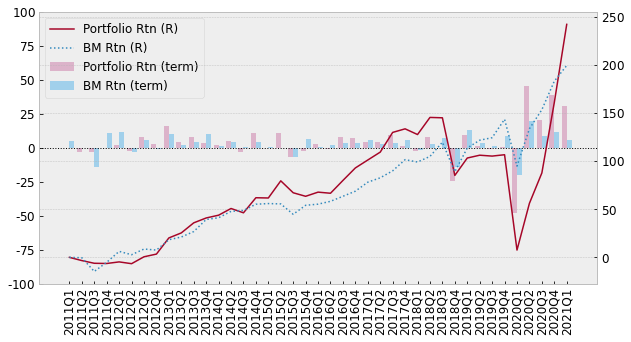

In [11]:
fs.draw_return(df)

In [13]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t, vol=1000000)
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)
    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']   
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] 

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [14]:
# GP/E + 소형주 + 증자X + 고유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 12.84%
Accumulated return: 235.11%
Investment period: 10.0yrs
Sharpe ratio: 1.30
MDD: -29.72%


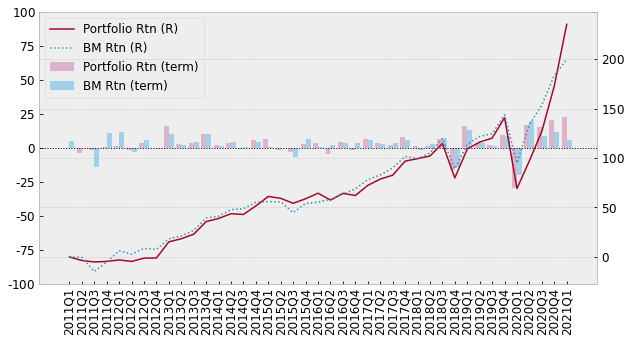

In [15]:
fs.draw_return(df)